In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from numpy import pi
import math
from scipy.special import hyp1f1
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def randWatsonMeanDir(N, k, p):

    min_thresh = 1/(5*N)

    step = 0.000001
    xx = np.arange(0, 1+step, step)

    yy = WatsonMeanDirDensity(xx, k, p)

    cumyy = yy.cumsum(axis=0)*(xx[1]-xx[0])

    leftBound = xx[np.ndarray.flatten(np.asarray((np.nonzero(cumyy>min_thresh/2.0))))][0]

    xx = np.linspace(leftBound, 1, 1000)

    yy = WatsonMeanDirDensity(xx, k, p)

    M = yy.max()

    t = np.zeros(int(N))



    for i in range (0, int(N)):
        while 1:
            x = np.random.uniform(0.0, 1.0)*(1-leftBound)+leftBound
            h = WatsonMeanDirDensity(x, k, p)
            draw = np.random.uniform(0.0, 1.0)*M
            if draw<=h:
                break
        if np.random.uniform(0.0, 1.0)>0.5:
            t[i] = x
        else:
            t[i] = -x

    return np.asarray(t)



In [6]:
def WatsonMeanDirDensity(x, k, p):
    Coeff = special.gamma(p/2.0) * (special.gamma((p - 1.0) / 2.0) * math.sqrt(pi) * hyp1f1(1.0/2.0, p/2.0, k))**(-1.0)
    y = Coeff*np.exp(k*x**2.0)*(1.0-x**2.0)**((p-3.0)/2.0)
    return y

def randUniformSphere(N, p):
    randNorm = np.random.normal(0, 1, size=[N, p])
    RandSphere = np.zeros((N, p))

    for r in range(0, N):
        RandSphere[r,] = np.divide(randNorm[r,], np.linalg.norm(randNorm[r,]))
    return RandSphere


def null(a, rtol=1e-5):
    u, s, v = np.linalg.svd(a)
    rank = (s > rtol*s[0]).sum()
    return v[rank:].T.copy()



In [7]:
def randWatson(N, mu, k):
    muShape = np.shape(mu)
    p = muShape[0]
    tmpMu = np.zeros(p)
    tmpMu[0] = 1

    t = randWatsonMeanDir(N, k, p)

    RandSphere = randUniformSphere(int(N), p - 1)

    t_m = np.tile(t, (p, 1)).transpose()
    tmpMu_m = np.tile(tmpMu, (N, 1))

    t_m2 = np.tile(((1 - t**2)**(0.5)), [p, 1]).transpose()
    RNDS = np.c_[np.zeros(int(N)), np.asarray(RandSphere)]

    RandWatson = t_m * tmpMu_m + t_m2*RNDS

    # Rotate the distribution to the right direction
    Otho = null(np.matrix(mu))

    Rot = np.c_[mu, Otho]
    RandWatson = (Rot * RandWatson.transpose()).conj()
    return RandWatson

In [10]:
k=5
N=1000.0
mu = [0,0,1]

xs, ys, zs = randWatson(N, mu, k)

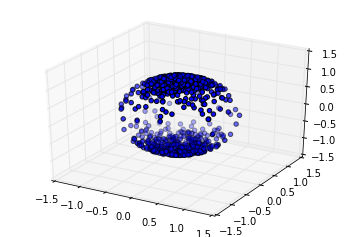

In [11]:
xs = np.ndarray.flatten(np.asarray(xs))
ys = np.ndarray.flatten(np.asarray(ys))
zs = np.ndarray.flatten(np.asarray(zs))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs)

ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])

plt.show()